This is the code used in first example of the article [Generative Adversarial Networks: Build Your First Models](https://realpython.com/generative-adversarial-networks/) on Real Python.

In [2]:
from IPython.core.debugger import set_trace

In [3]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [4]:
torch.manual_seed(111)

In [5]:
train_data_length = 1024
train_data = torch.zeros((train_data_length,2))
train_data[:,0] = 2*math.pi*torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_length)
trainset = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

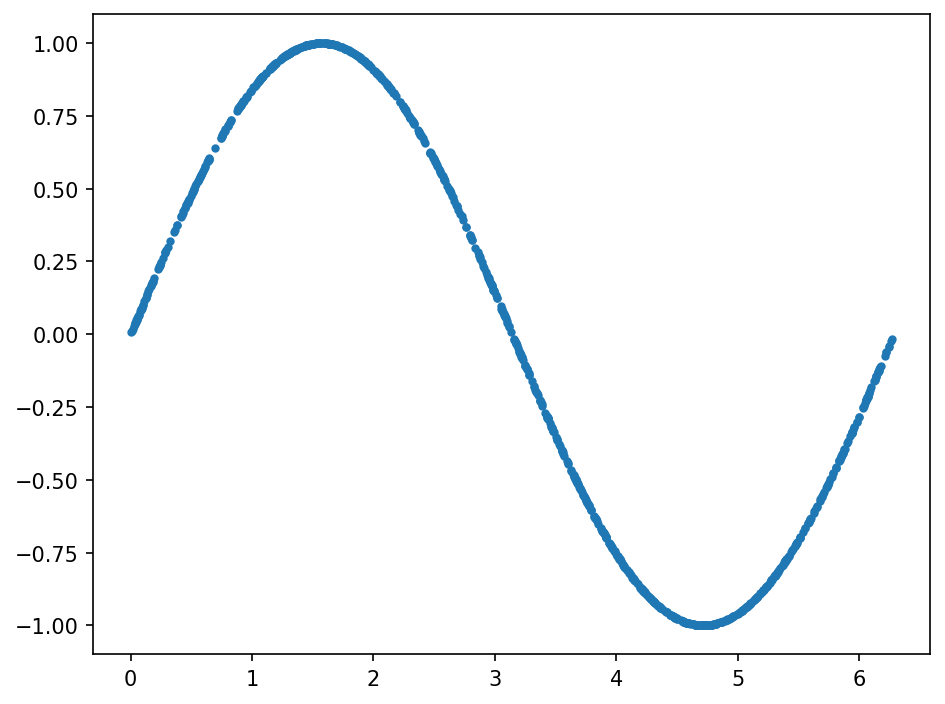

In [6]:
plt.figure(dpi=150)
plt.plot(train_data[:, 0], train_data[:, 1], '.')
plt.tight_layout()

In [7]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(trainset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [9]:
discriminator = Discriminator()

In [10]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),            
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [11]:
generator = Generator()

In [12]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [13]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [14]:
latent_space_samples_plot = torch.randn((128, 2))

In [15]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.2736859619617462
Epoch: 0 Loss G.: 2.2644355297088623
Epoch: 10 Loss D.: 0.6698535680770874
Epoch: 10 Loss G.: 1.1330938339233398
Epoch: 20 Loss D.: 0.6319764852523804
Epoch: 20 Loss G.: 0.7881577610969543
Epoch: 30 Loss D.: 0.6185157895088196
Epoch: 30 Loss G.: 0.9383388757705688
Epoch: 40 Loss D.: 0.6609629392623901
Epoch: 40 Loss G.: 0.9687981605529785
Epoch: 50 Loss D.: 0.5514283776283264
Epoch: 50 Loss G.: 0.743661642074585
Epoch: 60 Loss D.: 0.6006290912628174
Epoch: 60 Loss G.: 0.9400648474693298
Epoch: 70 Loss D.: 0.6939261555671692
Epoch: 70 Loss G.: 0.7630684971809387
Epoch: 80 Loss D.: 0.714470624923706
Epoch: 80 Loss G.: 0.6929368376731873
Epoch: 90 Loss D.: 0.5723965764045715
Epoch: 90 Loss G.: 0.9175713062286377
Epoch: 100 Loss D.: 0.6641911864280701
Epoch: 100 Loss G.: 0.8343378305435181
Epoch: 110 Loss D.: 0.6796022653579712
Epoch: 110 Loss G.: 0.6685250401496887
Epoch: 120 Loss D.: 0.7100076675415039
Epoch: 120 Loss G.: 0.7192100882530212
Epoch: 130

In [16]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

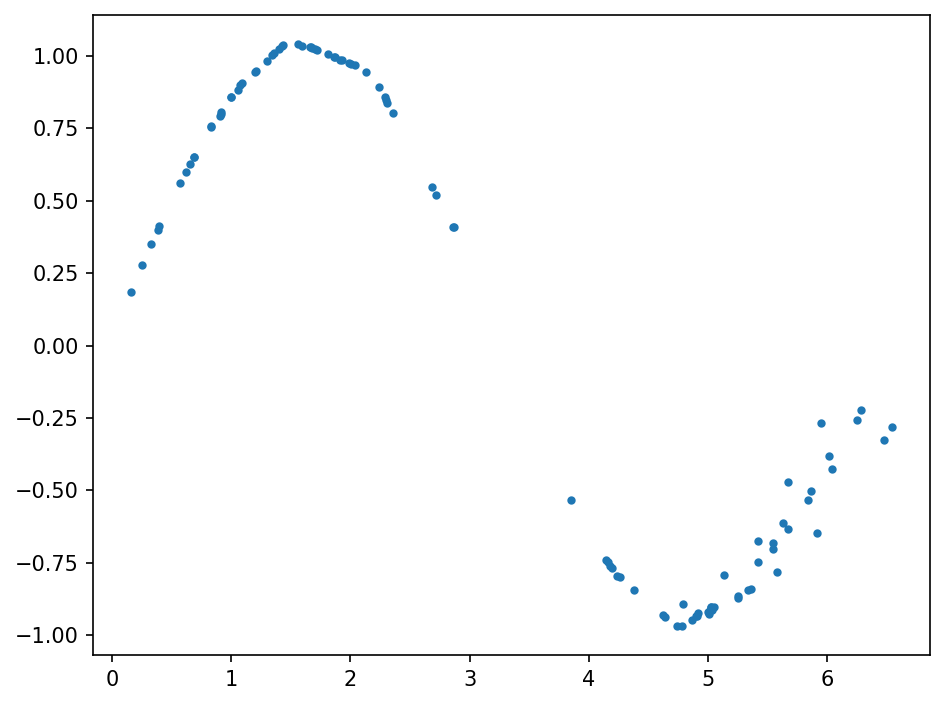

In [17]:
generated_samples = generated_samples.detach()
plt.figure(dpi=150)
plt.plot(generated_samples[:,0], generated_samples[:,1], '.')
plt.tight_layout()